# Plotting Spatial data

*by Felix*

Notebook show how to plot the original spatial data. For actually plotting use the plotting_spatial.py script.

We first need to import all the needed modules.

In [49]:
# Load libraries
import os
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rio

Set Working directory

In [2]:
#path = os.getcwd()
path = '/Users/felixbehrendt/neuefische/Radiant-Earth-Spot-Crop/'
# Set Workign directory and print
os.chdir(path)
print(f'Current Working directory: {path}')

Current Working directory: /Users/felixbehrendt/neuefische/Radiant-Earth-Spot-Crop/


In [45]:
def find_files(path_meta: str, tile_id: list, asset: list, bands:list, start_date: str, end_date:str) -> pd.DataFrame:
    """ Returns a subset of the dataset based on the desired conditions

    Args:
        path_meta (str): path to the metadata of the images
        tile_id (list):  list of desired Tile_id
        asset (list): list of desired assets: Currently available
        
        'documentation', 'field_ids', 'field_info_train', 'labels',
        'raster_values'

        bands (list): list of desired bands: Currently available
        'B02', 'B03', 'B04', 'B08', 'B11', 'B12', 'CLM'

        start_date (str): including start date in the format "YYYY-MM-DD"
        end_date (str): including end date in the format "YYYY-MM-DD"

    Returns:
        pd.DataFrame: subset of the dataset based on the conditions
    """


    # Load metadata
    df = pd.read_csv(path_meta)
    
    # just in case
    df['date']= pd.to_datetime(df['datetime'])

    df_asset = df[(df.tile_id.isin(tile_id) & df.asset.isin(asset))]

    df_bands = df[(df.tile_id.isin(tile_id)) & (df.asset.isin(bands)) & (df.date >= start_date) & (df.date <= end_date)]

    return pd.concat([df_asset, df_bands], ignore_index=True)
    

In [101]:
# set path to metadata
path = '/Users/felixbehrendt/neuefische/Radiant-Earth-Spot-Crop/data/train_data.csv'

# get subset of the data
# Tiles: 96, 101, 1250; assets = labels, Bands: B02, B03, B04 in April
df_sub = find_files(path, tile_id=[1250], asset =['labels', 'field_ids'], bands=['B02', 'B03', 'B04', 'B11', 'CLM'], start_date="2017-04-9", end_date="2017-04-12")
df_sub.head(6)

,tile_id,datetime,satellite_platform,asset,file_path,date
0,1250,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...,NaT
1,1250,NaN,NaN,labels,./data/ref_south_africa_crops_competition_v1_t...,NaT
2,1250,2017-04-11T00:00:00Z,s2,B02,./data/ref_south_africa_crops_competition_v1_t...,2017-04-11 00:00:00+00:00
3,1250,2017-04-11T00:00:00Z,s2,B03,./data/ref_south_africa_crops_competition_v1_t...,2017-04-11 00:00:00+00:00
4,1250,2017-04-11T00:00:00Z,s2,B04,./data/ref_south_africa_crops_competition_v1_t...,2017-04-11 00:00:00+00:00
5,1250,2017-04-11T00:00:00Z,s2,B11,./data/ref_south_africa_crops_competition_v1_t...,2017-04-11 00:00:00+00:00


In [109]:
def plot_image(file_path: str, cmp:str='viridis'):
    """Plot the image 

    Args:
        file_path (str): Path to a file
        cmp (str): Colourmap as str
        'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 
        'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
        'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
         'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
         'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 
         'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 
         'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 
         'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 
         'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 
         'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm',
          'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 
          'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 
          'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 
          'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 
          'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 
          'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain',
           'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 
           'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'
    """
    
    # load image
    image = rio.open_rasterio(file_path).squeeze()

    # plot picture
    image.plot.imshow(cmap=cmp)

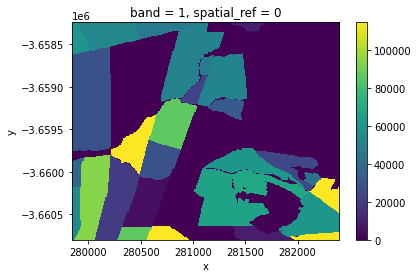

In [110]:
plot_image(df_sub.file_path[0])

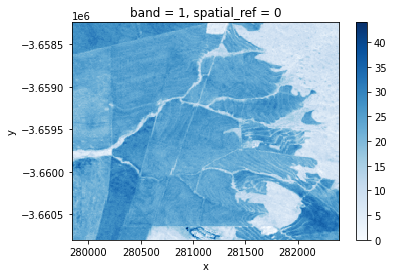

In [111]:
plot_image(df_sub.file_path[2], cmp = 'Blues')